In [1]:
#Cargar toda las librerias que estoy usando
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import random


In [364]:
#1.
#Cargar los datos de cierre del Ibex con dividendos que están en el fichero ibex_div_data_close.csv

In [2]:
df = pd.read_csv('ibex_div_data_close.csv', 
                    header = 0,
                    index_col = 'Unnamed: 0')
df.index = pd.to_datetime(df.index)


In [3]:
#2.Calcula los retornos logarítmicos de la serie
#2.1
# segun https://www.desarrollo-web-br-bd.com/es/python/retornos-logaritmicos-en-pandas-dataframe/1055004972/
#esta en la mejor función para calcular los retornos logarítmicos
# y me parece muy lógica esta versión
df['ret_log'] =np.log(df.close/df.close.shift(1)).dropna()

#como el df.iloc[0,1] sale NAN, pues le pongo el valor 0 pq los ret log en esta posición seria 0 
df.iloc[0,1] =0

#el profesor habla que hay que hacer la suma por ser logarítmico como si fuera el acumulado.
# He visto https://estrategiastrading.com/rentabilidad-logaritmica/
# Dice: Con la rentabilidad logarítmica sí se puede sumar la rentabilidad de 
# los distintos periodos para obtener la rentabilidad total.
# Por lo que la rentabilidad compuesta de n periodos, no es más que la diferencia 
# entre ln(precio final) – ln(precio inicial)
# Pero luego no se usa esta característica para este df. Asi que lo quito
# df['rent_comp'] =df.ret_log-df.ret_log.shift(1).dropna()

df


,close,ret_log
2003-07-30,9755.3,0.000000
2003-07-31,9755.3,0.000000
2003-08-01,9785.1,0.003050
2003-08-04,9714.6,-0.007231
2003-08-05,9779.3,0.006638
...,...,...
2020-05-27,21087.5,0.024064
2020-05-28,21233.4,0.006895
2020-05-29,20858.3,-0.017823
2020-06-01,21225.6,0.017456


In [4]:
#2.2 Compruebo que no hay NaNs
df.isna().sum().sum()

0

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


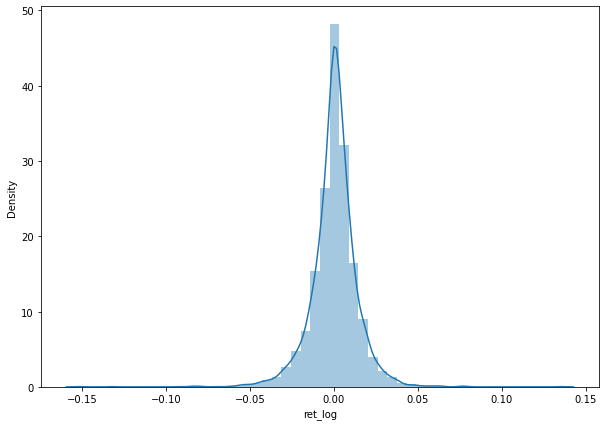

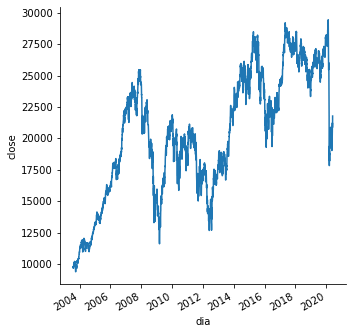

In [5]:
#3. Realiza una figura de la distribución de los retornos. Observas?
# Voy a hacer dos figuras. Una de distplot de seaborn (como pide el enunciado del ret_log) 
# y otra de la evolución del close

fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.distplot(df.ret_log)

#para hacer esta figura, tengo que tener los días en una columna
df['dia'] = pd.to_datetime(df.index)

g = sns.relplot(x="dia", y="close", kind="line", data=df)
g.figure.autofmt_xdate()

# Entiendo que la única grafica lógica es primera correspondiente a df.ret_log. 
# Se ve que sus valores son muy centrados a el cero y hay algunos muy pocos
# dias que se van a una desviación mayor de 0.05
# Es una distribución normal bastantes simétrica y mucho mas centrada en en 0 que la siguiente (punto )

# Aunque da el waring que la función distplot sera reemplazada pronto, no he echo nada
# pq el enunciado habla de usar esa función.


In [6]:
#4.Simulacion de Montecarlo
#4.1
#4.1.1 calcular la media de los retornos obtenidos en el apartado anterior
#y
#4.1.2 Calcular la desviacion tipica de los retornos obtenidos en el apartado anterior
# la Cuasi-desviación típica es segun 
#https://www.odiolaestadistica.com/estadistica-python/varianza/
#En python, utilizamos el método .std() para calcular la cuasi-desviación típica. 
#Para calcular la desviación típica, nuevamente utilizamos ddof=0.
#En los apuntes dice std Desviación estándar de los elementos.

#Profesor dijo que la mu y la sigma se ha de calcular respecto a la serie retornos originales.
#Entonces, entiendo que se han de calular la mean y el std sobre df['ret_log']
#Profesor me lo confirmó por email

mu = df['ret_log'].mean()
sigma = df['ret_log'].std(ddof=0)


In [7]:
# 4.2
# 4.2.1
# Genera un df
# COLUMNAS: 1000 columnas
# FILAS: 5 anhos de filas desde el ultimo día de la serie original 
# (entiendo que seria +1 dia de la serie original)
# DATOS: lo relleno de NaNs

# Calculo el día ultimo y le sumo una delta de 1 día y
#  me sale '2020-06-03'
start = df.index[len(df)-1] + timedelta(1)
# Entonces 5 anhos mas es '2025-06-03'

start = df.index[len(df)-1] + timedelta(1)

dias = pd.date_range('2020-06-03', 
                     '2025-06-03', 
                     freq='B')

df_2 = pd.DataFrame(np.nan, 
                      columns = np.arange(1,1001),
                      index =  dias)

In [8]:
# 4.2.2
# Relleno el df_2 según enunciado: Forma aleatoria 
# siguiendo distribucion normal 
# con la media y desv. tipica obtenida anteriormente Punto 4.1.2
# en los apuntes no hay este caso. Así que he mirado en el 
# link de los apuntes.
# https://docs.python.org/dev/library/random.html
# random.normalvariate(mu = 0.0, sigma = 1.0)
# Normal distribution. mu is the mean, and sigma is 
# the standard deviation.
# Changed in version 3.11: mu and sigma now have default arguments.

for j in range(1000):
    for i in range(len(df_2)):
        temp = random.normalvariate(mu, sigma)        
        df_2.iloc[i,j] = temp



In [17]:
# compruebo que no hay NaNs
df_2.isna().sum().sum()


0

In [120]:
#5. Simulacion de Bootstrapping
# No he visto en los apuntes esta tipo de simulación
# No dice como ha de ser el calculo del muestreo aleatorio; así que uso uno randint
# Genera una muestra de números aleatorios enteros dentro de un rango definido.

In [18]:
#5.1
#Creo un nuevo df de NaNs como hice el punto 4.2.1, que le llamo df_3
start = df.index[len(df)-1] + timedelta(1)

dias = pd.date_range('2020-06-03', 
                     '2025-06-03', 
                     freq='B')
df_3 = pd.DataFrame(np.nan, 
                      columns=np.arange(1,1001),
                      index= dias)


In [19]:
# 5.2 
# Usando reemplazo aleatorios de los retornos de la serie original.
# Entiendo que del la columna del df original df.iloc[:,1]; columna 1 
# es ret_log es la que hay que pasar.
# los valores a nuevo df_3
# Entonces hay que sacar aleatorios del 0 a numero de filas de df, e ir 
# por filas cargándolos en el df_3.
# Es aleatorio el orden en que se selecciona valor de df.ret_log. Y se 
# puedo coger mas de una vez, no excluyente

max_valor_n_random = len(df)
for j in range(1000):
    for i in range(len(df_3)):
        temp = random.randint(0,max_valor_n_random)
        df_3.iloc[i,j] = df.iloc[temp-1,1]
df_3

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
2020-06-03,0.001091,-0.002619,0.016260,0.008821,0.019704,0.009710,0.009450,-0.001683,0.002352,-0.000532,...,0.006217,-0.005543,0.013415,-0.008267,0.002153,-0.004102,-0.005895,-0.003197,-0.002588,0.005214
2020-06-04,-0.000861,-0.023658,0.011878,-0.009249,-0.009134,0.007931,-0.004605,0.029186,-0.021720,0.000000,...,-0.006981,-0.019111,0.005248,0.001371,0.013471,-0.024422,0.025136,0.000997,0.000978,0.000000
2020-06-05,0.002462,-0.012338,0.000013,-0.023578,0.009772,0.001931,-0.000919,0.009529,0.005630,0.016039,...,0.008010,-0.008832,0.000172,0.007816,0.007662,-0.006185,0.014679,-0.014184,-0.005575,0.022526
2020-06-08,-0.002493,-0.004038,0.002109,-0.022091,0.000000,-0.060001,-0.004694,-0.020758,0.009613,-0.007401,...,0.003950,-0.023219,0.008442,0.013118,0.000492,-0.040547,-0.029134,-0.020443,-0.002695,0.002278
2020-06-09,0.004618,-0.001287,-0.018020,0.009732,0.003208,-0.041082,-0.023219,0.010263,0.007648,0.016102,...,0.000000,-0.012836,-0.021536,0.002523,-0.003071,-0.034671,0.011067,0.001055,0.000000,-0.009621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-28,-0.000101,0.009312,0.011942,0.009828,0.013531,0.017219,0.001984,0.002134,0.014901,-0.006181,...,-0.009510,-0.008462,-0.002574,-0.010580,-0.042405,0.002962,-0.007539,0.016819,0.010054,0.004969
2025-05-29,-0.017838,-0.001231,0.002201,0.000445,0.000000,-0.003796,-0.023658,0.000576,0.011102,-0.023733,...,-0.000117,-0.002250,0.019470,0.007880,0.006376,0.007310,-0.004572,0.015313,0.002192,0.014055
2025-05-30,0.052956,0.006364,-0.016022,-0.000397,-0.013714,-0.004288,0.016891,-0.011201,-0.003971,0.015161,...,-0.005827,0.001857,-0.003872,-0.009038,0.009588,0.020321,-0.005721,0.003512,0.015801,-0.024280
2025-06-02,-0.002807,0.008191,0.004348,0.017133,0.000302,0.010604,-0.016617,0.017958,-0.003213,0.009142,...,-0.023578,0.009303,0.003670,-0.002693,-0.012035,0.004160,0.023691,0.011745,0.002783,-0.027527


In [20]:
# compruebo que no hay NaNs
df_3.isna().sum().sum()

0

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


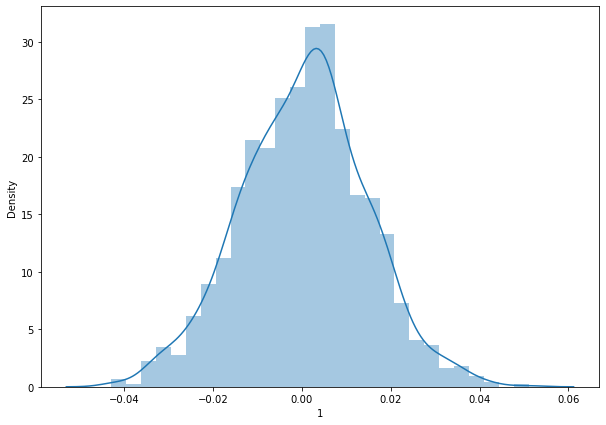

In [21]:
#6. De una simulacion por metodo
#haz figura de la distribucion de los retornos usando displot de seaborn, p.ej.
#Compara las figuras. Conclusiones?

# 6.1 De Simulacion de Montecarlo; displot de seaborn soble los datos de una unica simulacion; 
# escojo la columna 0.
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.distplot(df_2.iloc[:,0])

# Entiendo que la única grafica lógica es primera correspondiente a df_2.iloc[:,0]. 
# Se ve que sus valores son muy centrados a el cero
# con mayor dispersion que en el punto 3 y  muy pocos 
# fuera del rango [-0.04, 0.04]
# Es una distribución normal bastantes simétrica y menos centrado al 0 que en fig 3.


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


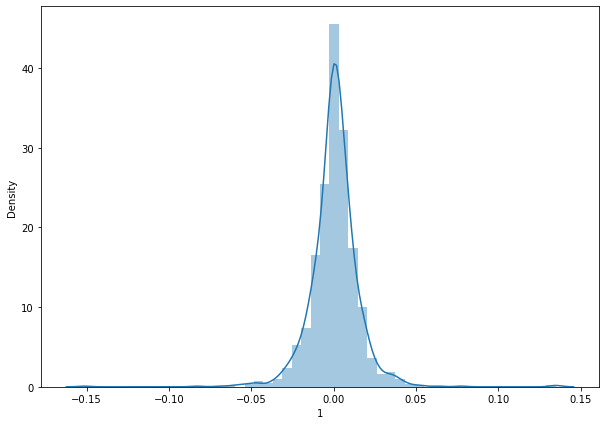

In [22]:
# 6.1 Simulacion de Bootstrapping; displot de seaborn soble los datos de una unica simulacion; 
# escojo la columna 0.
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.distplot(df_3.iloc[:,0])

# Entiendo que la única grafica lógica es primera correspondiente a df_3.iloc[:,0]. 
# Se ve que sus valores son muy centrados a el cero
# con mayor dispersion que en el punto Simulacion de Montecarlo y  con bastantes   
# fuera del rango [-0.04, 0.04]
# Es una distribución normal bastantes simétrica y menos centrado al 0 que en fig 3.

In [21]:
#6: Conclusiones:
# Simulación de Bootstrapping esta mas centrada al cero. Si se usa esta,
# mejor es reemplazar los valores fuera del rango [-0.05, 0.05]
# Usaria De Simulacion de Montecarlo para uan distribucion mas cariada.

In [23]:
#Ej 7.1
# De Simulación de Montecarlo; calcula la evolución temporal
# de invertir una unidad monetaria en cada una de las 1000 
# simulaciones generadas.
#7.1.1 Crear un df equivalente al df_2 con NaNs y en fila 0 todos unos
dias = pd.date_range('2020-06-03', 
                     '2025-06-03', 
                     freq = 'B')

df_7_1 = pd.DataFrame(np.nan, 
                      columns=np.arange(1,1001),
                      index= dias)
df_7_1.iloc[0,:] = 1


In [24]:
#7.1.2
# como segun https://estrategiastrading.com/rentabilidad-logaritmica/:
# https://estrategiastrading.com/rentabilidad-logaritmica/
# "Con la rentabilidad logarítmica sí se puede sumar la rentabilidad de 
# los distintos periodos para obtener la rentabilidad total.
# Por lo que la rentabilidad compuesta de n periodos, no es más 
# que la diferencia entre ln(precio final) – ln(precio inicial)".
# Entonces voy sumando el valor de la anterior la rentabilidad de la posicion que tenga.
# Es decir 1+0.007650(que es df_2.fila2) y la pongo en df_7_1 en la fila segunda.
# Luego 1+0.007650+(-0.000710(que es df_2.fila3)) y la pongo en df_7.1 en la fila tercera.

# Entiendo que empiezo con 1 y ya en la primera fila hago la suma con la rentabilidad.
# Entonces primera fila es 1 + df_2.iloc[1,j]
# Así me saldría al final del día la rentabilidad de 1 euro invertido el primer día.
for i in range(1000):
    df_7_1.iloc[0,i] = df_2.iloc[0,i] + 1

# para el resto de dias
for j in range(1000):
    for i in range(1,len(df_7_1)):     
        df_7_1.iloc[i,j] = df_2.iloc[i,j] + df_7_1.iloc[i-1,j]


In [25]:
# compruebo que no hay NaNs
df_7_1.isna().sum().sum()

0

In [26]:
#Ej 7.2
# De Simulación de Bootstraping; calcula la evolución temporal
# de invertir una unidad monetaria en cada una de las 1000 
# simulaciones generadas.
#7.2.1 Crear un df equivalente al df_3 con NaNs y en fila 0 todos unos
dias = pd.date_range('2020-06-03', 
                     '2025-06-03', 
                     freq = 'B')
df_7_2 = pd.DataFrame(np.nan, 
                      columns = np.arange(1,1001),
                      index = dias)

In [27]:
#7.2.2; como el punto 7.1.2 pero usando como refenrencia df_3; 
# basado en Bootstraping.
for i in range(1000):
    df_7_2.iloc[0,i] = df_3.iloc[0,i] + 1

# para el resto de dias
for j in range(1000):
    for i in range(1,len(df_7_2)):     
        df_7_2.iloc[i,j] = df_3.iloc[i,j] + df_7_2.iloc[i - 1,j]


In [28]:
# compruebo que no hay NaNs
df_7_2.isna().sum().sum()

0

<AxesSubplot:>

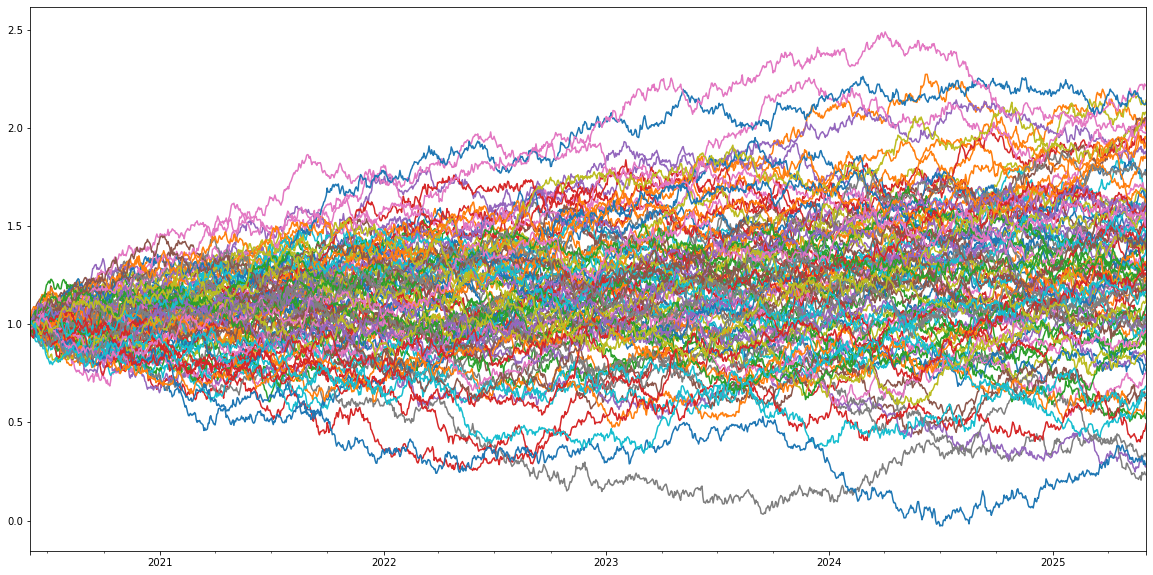

In [29]:
#8 
# 8.1 De Simulación de Montecarlo; obtener una figura de 
# 100 simulaciones. Escojo las del 0 al 99 del df_7_1
df_7_1_1 = df_7_1.loc[:,:100]
df_7_1_1.plot(figsize = (20,10),legend = None)

<AxesSubplot:>

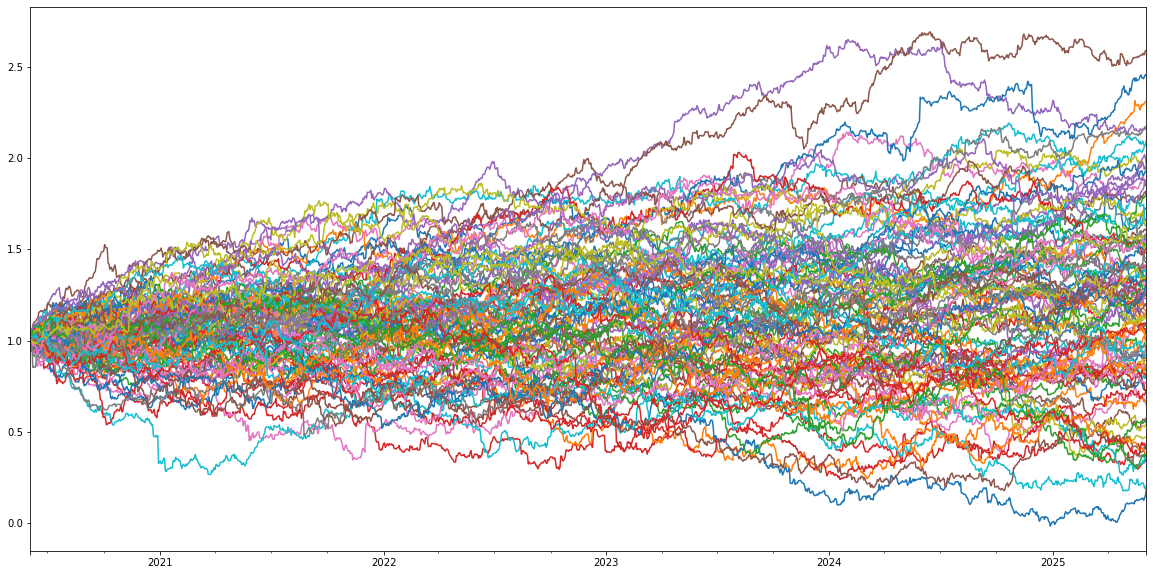

In [30]:
#8.2 De Simulación de Bootstraping; obtener una figura 
# de 100 simulaciones. Escojo las del 0 al 99 del df_7_2
df_7_2_1 = df_7_2.loc[:,:100]
df_7_2_1.plot(figsize = (20,10),legend = None)

<AxesSubplot:>

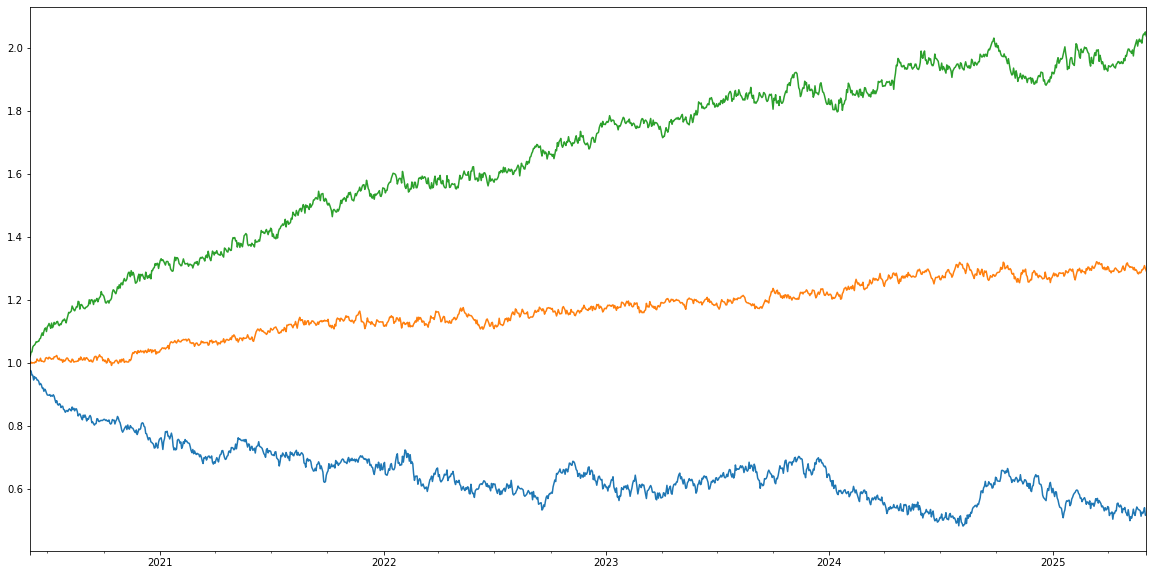

In [31]:
# 9 y 10
# 9.1 y 10.1 De Simulación de Montecarlo; de la df de simulación, 
# que es df_7_1_1, saco para cada día los los retornos que ocupan 
# los perceptibles 0.05, 0.5 y 0.95.
perc_5 = list()
perc_50 = list()
perc_95 = list()
def f_5(x):
    return np.percentile(x, 5)
def f_50(x):
    return np.percentile(x, 50)
def f_95(x):
    return np.percentile(x, 95)
perc_5 = df_7_1_1.apply(f_5, axis = 'columns')
perc_50 = df_7_1_1.apply(f_50, axis = 'columns')
perc_95 = df_7_1_1.apply(f_95, axis = 'columns')

perc_5.plot(figsize = (20,10))
perc_50.plot(figsize = (20,10))
perc_95.plot(figsize = (20,10))


<AxesSubplot:>

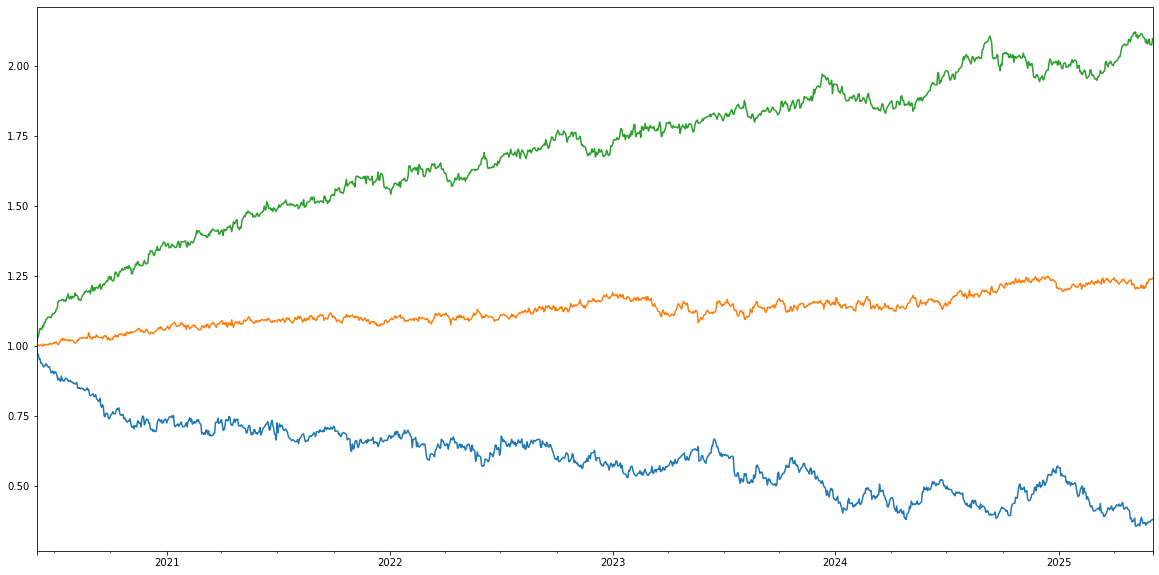

In [32]:
# 9.2 y 10.2 De Simulación de Bootstraping; de la df de simulación, 
# que es df_7_2_1, saco para cada día los los retornos que ocupan 
# los perceptibles 0.05, 0.5 y 0.95.
perc_5 = list()
perc_50 = list()
perc_95 = list()
def f_5(x):
    return np.percentile(x, 5)
def f_50(x):
    return np.percentile(x, 50)
def f_95(x):
    return np.percentile(x, 95)
perc_5 = df_7_2_1.apply(f_5, axis = 'columns')
perc_50 = df_7_2_1.apply(f_50, axis = 'columns')
perc_95 = df_7_2_1.apply(f_95, axis = 'columns')

perc_5.plot(figsize = (20,10))
perc_50.plot(figsize = (20,10))
perc_95.plot(figsize = (20,10))



In [ ]:
# 11 Realiza uan comparacion de los dos metodos y extrae conclusiones. Cual crees que es mejor?
# Simulación de Bootstraping tiene mayor diferencia entre los percentiles 0.95 y 0.05
# El percentil 0.5 al final es casi el mismo en las dos simulaciones y casi 
# da un rendimiento de 0 en las dos carteras.
# En el libro Advance in Financial Machine Learning, dando como ejemplo los puntos 16.3 y 16.6  se podria detallar más diferenecias. 

